In [26]:
from sklearn.neighbors import KDTree
import tables
from tables import *
import numpy as np
import glob
import tqdm 
import os
import matplotlib.pyplot as plt

In [3]:
with open_file("TrainDataProjection.h5","r", driver="H5FD_CORE") as h5f:
    axeXTrain = h5f.root.Train.projection.read(field="firstCol")
    axeYTrain = h5f.root.Train.projection.read(field="firstCol")
    axeZTrain = h5f.root.Train.projection.read(field="firstCol")

In [23]:
TrainData = np.array([axeXTrain,axeYTrain,axeZTrain]).T
TrainData.shape

(1058742, 3)

In [24]:
tree = KDTree(TrainData, leaf_size=530000)

In [25]:
dist, ind = tree.query(TrainData, k=3) # 3 plus proches voisins
print(dist)

[[0.00000000e+00 1.18930491e-04 1.98217484e-04]
 [0.00000000e+00 0.00000000e+00 5.28579958e-05]
 [0.00000000e+00 1.32144990e-05 6.60724948e-05]
 ...
 [0.00000000e+00 2.64289979e-05 6.60724948e-05]
 [0.00000000e+00 1.32144990e-05 2.64289979e-05]
 [0.00000000e+00 1.32144990e-05 2.64289979e-05]]


In [44]:
# write train data indexes (events) into a binary file
ind.tofile(open("ind.txt", "bw"))

In [50]:
# retrieve train data indexes (events)
train_index = np.fromfile(open("ind.txt", "rb"),dtype=np.int64)

In [47]:
# write train data distances into a binary file
dist.tofile(open("dist.txt", "bw"))

In [51]:
# retrieve train data distances
train_dist = np.fromfile(open("dist.txt", "rb"),dtype=np.float64)

In [121]:
# retrieve some parameter values from train data
def get_param_values(fnames):
    #read 1 column
    with open_file(fnames, "r", driver="H5FD_CORE") as f:
        idevent = f.root.Shower.gerbe.read(field="idevent")
        energy = f.root.Shower.gerbe.read(field="energy")
        #print("idevent ",idevent)

    return idevent, energy

In [130]:
fnames = glob.glob('hash_training/*.h5', recursive=True)

In [134]:
# get events and energies values from files
events = []
my_energies = []
for input in fnames:
    idevent,energy= get_param_values(input)
    events.append(idevent)
    my_energies.append(energy)

In [135]:
my_events = np.zeros(len(events))
energies = np.zeros(len(my_energies))
for f in range(len(fnames)):
    my_events = np.concatenate((my_events, events[f]))
    energies = np.concatenate((energies, my_energies[f]))
my_events.shape, energies.shape

((1059346,), (1059346,))

In [151]:
for s in range(int(train_index.shape[0]/3)):
    if train_index[s] == int(my_events[s]):
        print("event ",train_index[s],"energy ",energies[s], "distance ", train_dist[s])
    

event  0 energy  0.0 distance  0.0
event  300608 energy  0.08189523965120316 distance  2.6428997918226276e-05
event  120709 energy  0.5792446136474609 distance  0.0


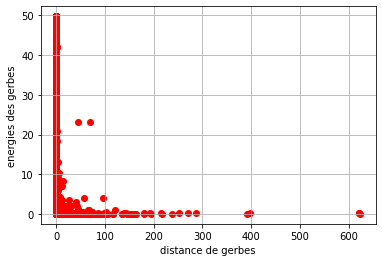

In [152]:
plt.xlabel("distance de gerbes")
plt.ylabel("energies des gerbes")
plt.grid()
plt.scatter(train_dist[0:energies.shape[0]],energies,c="r")